### Student Name: Nicholas Marshall

In [14]:
%matplotlib inline

from sklearn import cluster, datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from sklearn.cluster import KMeans, DBSCAN
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [15]:
#Create the sample data

moons_data_x, moons_data_y = datasets.make_moons(n_samples=2000, noise=0.09, random_state=7)
df = pd.DataFrame(moons_data_x, moons_data_y)

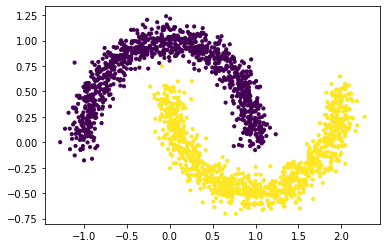

In [16]:
#plot the data
plt.scatter(moons_data_x[:,0], moons_data_x[:,1], c=moons_data_y, s=10)

## k-Means
cluster the dataset using the k-means algorithm

In [17]:
kmeans = KMeans(n_clusters= 2, #TODO: enter a value 
                init='k-means++', 
                max_iter= 200, #TODO: enter a value 
                n_init= 5, #TODO: enter a value 
                random_state=7)

kmeans_labels = kmeans.fit(moons_data_x)

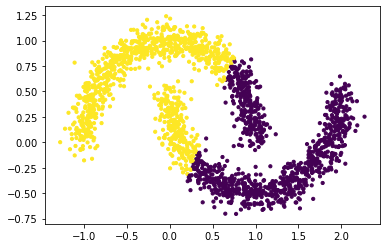

In [18]:
#visualize the results from k-means
plt.scatter(moons_data_x[:,0], moons_data_x[:,1], c=kmeans_labels.labels_, s=10)

### Question
- What are your thoughts on the cluster(s)? Are there outliers and was k-means able to detect them?

K-means is not good for this task. Just looking at the data, it is apparent there are two groups. K-means can't identify these groups because it creates a linear boundary, and the two groups overlap that boundary.

## DBSCAN
Cluster the dataset using the DBSCAN algorithm

In [19]:
#Credit to Will Koehrsen for explanation on how to integrate ipywidgets for interactive plots
# https://github.com/WillKoehrsen


!jupyter nbextension enable --py widgetsnbextension
def dbscan_grapher(eps = (.0000001, 1, .000001),
                  min_samples = (1, 100, 1)):
    
    dbscan = DBSCAN(eps=eps, #TODO: enter a value -- NOTE: I manually tuned this
                min_samples=min_samples #TODO: enter a value 
               )
    dbscan_labels = dbscan.fit(moons_data_x)
    plt.scatter(moons_data_x[:,0], moons_data_x[:,1], c=dbscan_labels.labels_, s=10)

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


### Question
- What are your thoughts on the cluster(s)? Are there outliers and was DBSCAN able to detect them?
- State the challenge of finding values for eps and min_samples. Would you be able to estimate these values without visualizing the data? (for example if you had 10-dimensional data)
- State the effect of eps and min_samples on the clusters and outliers

- There appears to be an outlier at coordinates (-.9, .76). DBSCAN was able to detect this.
- My main method for finding eps and min_samples has been to guess and visually check, facilitated by loops. Since my method depends on visualization, I would not be able to use this method for higher dimensional data where visualization is impossible. Were I to have 10-dimensional data, I would probably have to learn and implement the methods discussed in _Dimensionality Reduction: A Comparative Review_.
- min_samples sets the minimum number of points needed to designate a cluster, eps(ilon) marks the distance (radius) within which those points must be found. As can be seen visually above, increasing the epsilon distance will tend to absorb outliers, so, in general, a larger epsilon results in a blurrier overlay on the dataset. Increasing min_samples tends to reveal outliers until such a point as the model breaks up into smaller, dense clusters. It may be reasonable to set a starting min_sample value, tune the epsilon, and then tune the min_samples to better identify outliers.  

## Summary
Compare the results from k-means and DBSCAN

K-means can't find non-linear patterns. DBSCAN can.

## Bonus Points (optional)
Cluster and visualize the dataset using a different algorithm in the scikit-learn library.

In [ ]:
#Playing around with Spectral Clustering

from sklearn.cluster import SpectralClustering

